In [72]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import copy
import pickle
import warnings

import numpy as np

from astropy.table import Table, QTable, Column, join, vstack

import matplotlib.pyplot as plt

import lsst.daf.butler as dafButler
import lsst.afw.image as afwImage

from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Merian data repo
root = '/projects/MERIAN/repo'

butler = dafButler.Butler(root)

## Single Exposure Reduction - Varying Key Background Subtraction Parameters

### Reference catalogs using the default configuration

In [53]:
#visits = [971900, 971677, 971903, 972365]
visits = [971900, 971677]

In [73]:
default_tabs = bin64_srcs = vstack(
    [Table.from_pandas(
        butler.get("sourceTable", instrument="DECam", visit=visits[0], detector=str(ccd), collections="DECam/runs/merian/w_2022_02")
    ) for ccd in detectors['ccd']])

default_srcs = bin64_srcs = vstack(
    [butler.get("src", instrument="DECam", visit=visits[0], detector=str(ccd), collections="DECam/runs/merian/w_2022_02").asAstropy() 
     for ccd in detectors['ccd']])

### Change the `binSize` to 64: 

- `u/sh19/merian_bkg/bin64/`

- Get the useful detectors
    - `ls N708/N708_DECam_c0012_7080.0_400.0/971900/src_DECam_N708_N708_DECam_c0012_7080_0_400_0_971900_* | awk -F_ '{print $16}' > decam_detectors.txt`

In [16]:
detectors = Table.read('decam_detectors.txt', format='ascii')

In [74]:
bin64_collection = 'u/sh19/merian_bkg/bin64'

bin64_tabs = vstack(
    [Table.from_pandas(
        butler.get("sourceTable", instrument="DECam", visit=visits[0], detector=str(ccd), collections=bin64_collection)
    ) for ccd in detectors['ccd']])

bin64_srcs = bin64_srcs = vstack(
    [butler.get("src", instrument="DECam", visit=visits[0], detector=str(ccd), collections=bin64_collection).asAstropy() 
     for ccd in detectors['ccd']])

-179.99865356832743 1670.0773529803505
-193.32530120760202 1672.1672447109513


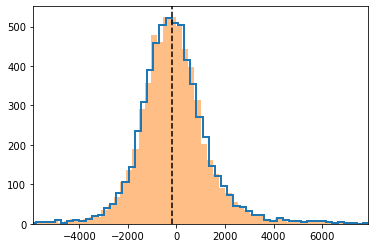

In [78]:
#sky_flux_default = default_srcs[default_srcs['sky_source'] & (default_srcs['ap09FluxErr'] > 0)]['ap09Flux']
#sky_flux_bins64 = bin64_srcs[bin64_srcs['sky_source'] & (bin64_srcs['ap09FluxErr'] > 0)]['ap09Flux']

sky_flux_default = default_srcs[default_srcs['sky_source'] & (default_srcs['base_CircularApertureFlux_35_0_instFluxErr'] > 0)]['base_CircularApertureFlux_35_0_instFlux']
sky_flux_bins64 = bin64_srcs[bin64_srcs['sky_source'] & (bin64_srcs['base_CircularApertureFlux_35_0_instFluxErr'] > 0)]['base_CircularApertureFlux_35_0_instFlux']

print(np.nanmedian(sky_flux_default), np.nanstd(sky_flux_default))
print(np.nanmedian(sky_flux_bins64), np.nanstd(sky_flux_bins64))

_ = plt.hist(sky_flux_default, bins=100, histtype='step', linewidth=2)
_ = plt.hist(sky_flux_bins64, bins=100, alpha=0.5)

_ = plt.axvline(np.nanmedian(sky_flux_default), c='k', linestyle='--')

_ = plt.xlim(-5900, 7900)

In [75]:
default_srcs.colnames

['id',
 'coord_ra',
 'coord_dec',
 'parent',
 'calib_detected',
 'calib_psf_candidate',
 'calib_psf_used',
 'calib_psf_reserved',
 'deblend_nChild',
 'deblend_deblendedAsPsf',
 'deblend_psfCenter_x',
 'deblend_psfCenter_y',
 'deblend_psf_instFlux',
 'deblend_tooManyPeaks',
 'deblend_parentTooBig',
 'deblend_masked',
 'deblend_skipped',
 'deblend_rampedTemplate',
 'deblend_patchedTemplate',
 'deblend_hasStrayFlux',
 'deblend_peak_center_x',
 'deblend_peak_center_y',
 'deblend_peakId',
 'deblend_nPeaks',
 'deblend_parentNPeaks',
 'sky_source',
 'base_NaiveCentroid_x',
 'base_NaiveCentroid_y',
 'base_NaiveCentroid_flag',
 'base_NaiveCentroid_flag_noCounts',
 'base_NaiveCentroid_flag_edge',
 'base_NaiveCentroid_flag_resetToPeak',
 'base_SdssCentroid_x',
 'slot_Centroid_x',
 'base_SdssCentroid_y',
 'slot_Centroid_y',
 'base_SdssCentroid_xErr',
 'slot_Centroid_xErr',
 'base_SdssCentroid_yErr',
 'slot_Centroid_yErr',
 'base_SdssCentroid_flag',
 'base_CircularApertureFlux_flag_badCentroid',
 '